# Advertisement Clickability Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [2]:
ad_data = pd.read_csv('ad.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploring the dataset

In [4]:
ad_data.shape

(1000, 10)

In [5]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
ad_data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [9]:
ad_data.size

10000

In [10]:
ad_data.value_counts()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Ad Topic Line                               City              Male  Country                 Timestamp            Clicked on Ad
32.60                     38   40159.20     190.05                Customizable homogeneous contingency        Tylerport         0     Syrian Arab Republic    2016-02-12 03:39:09  1                1
75.92                     22   38427.66     182.65                Monitored context-sensitive initiative      Port Calvintown   0     Russian Federation      2016-02-26 01:18:44  0                1
75.55                     36   31998.72     123.71                Decentralized attitude-oriented interface   South Davidmouth  1     Bosnia and Herzegovina  2016-03-12 06:05:12  1                1
                               73234.87     159.24                Managed grid-enabled standardization        Ramirezside       0     Liechtenstein           2016-05-09 02:58:58  1                1
75.64          

## Preprocessing

#### checking for missing values

In [11]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#### Handling Categorical Variables

In [12]:
data = pd.get_dummies(ad_data, columns=['Country'], drop_first=True)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Timestamp,Clicked on Ad,Country_Albania,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,2016-03-27 00:53:11,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,2016-04-04 01:39:02,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,2016-03-13 20:35:42,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,2016-01-10 02:31:19,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,2016-06-03 03:36:18,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_19908\3491021352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ad_data.corr(), annot=True, cmap='coolwarm')


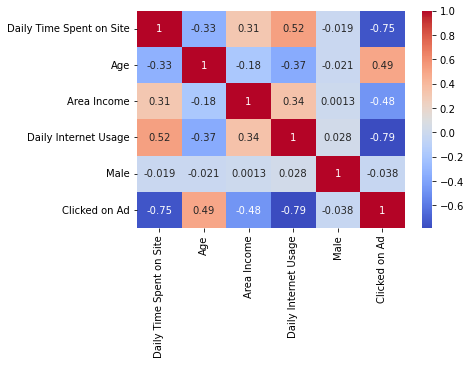

In [13]:
sns.heatmap(ad_data.corr(), annot=True, cmap='coolwarm')
plt.show()

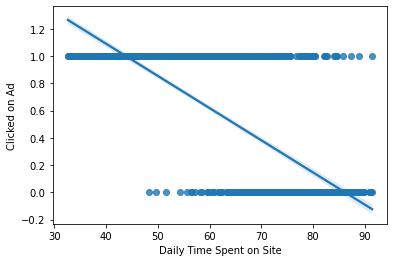

In [14]:
sns.regplot(x='Daily Time Spent on Site', y='Clicked on Ad', data=ad_data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

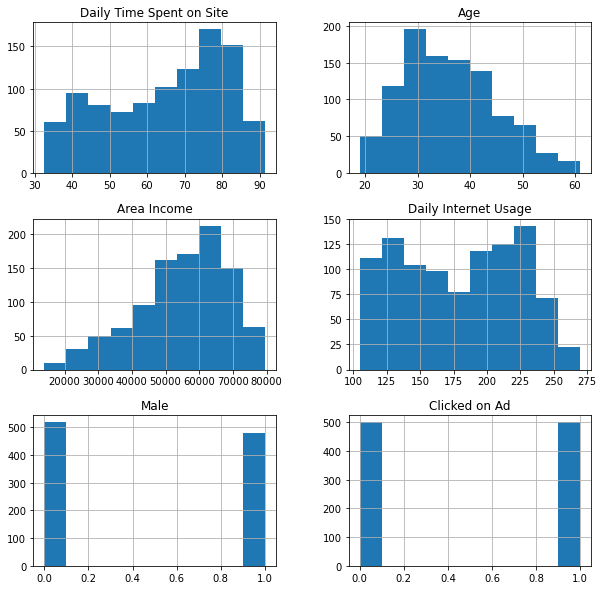

In [15]:
ad_data.hist(figsize=(10,10))
plt.show

## Extract X and Y

In [16]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [17]:
y = ad_data['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Split the data into training set and testing set using train_test_split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train and Evaluate Several Machine Learning Models

### Model 1: Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

### Model 2: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model2= LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

### Model 3: DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

### Model 4: RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)

RandomForestClassifier()

### Model 5: SVM

In [28]:
from sklearn.svm import SVC

In [29]:
model5 = SVC()
model5.fit(X_train,y_train)

SVC()

## Predictions 

In [30]:
y_pred= model1.predict(X_test).round()

In [31]:
y_pred2= model2.predict(X_test).round()

In [32]:
y_pred3=model3.predict(X_test).round()

In [33]:
y_pred4= model4.predict(X_test).round()

In [34]:
y_pred5= model5.predict(X_test).round()

## Evaluate Models

### Model 1: Linear Regression

In [35]:
print(model1.__class__.__name__)
print("Accuracy:",accuracy_score(y_test, y_pred) )
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("="*50)

LinearRegression
Accuracy: 0.9515151515151515
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       162
           1       0.99      0.92      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

[[160   2]
 [ 14 154]]


### Model 2: Logistic Regression

In [36]:
print(model2.__class__.__name__)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print("="*50)

LogisticRegression
Accuracy: 0.9696969696969697
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

[[159   3]
 [  7 161]]


### Model 3: DecisionTreeClassifier

In [37]:
print(model3.__class__.__name__)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print("="*50)

DecisionTreeClassifier
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       162
           1       0.94      0.93      0.93       168

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

[[152  10]
 [ 12 156]]


### Model 4: RandomForestClassifier

In [38]:
print(model4.__class__.__name__)
print("Accuracy:",accuracy_score(y_test, y_pred4 ))
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print("="*50)

RandomForestClassifier
Accuracy: 0.9545454545454546
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.96      0.95      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

[[156   6]
 [  9 159]]


### Model 5: SVM

In [39]:
print(model5.__class__.__name__)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print("="*50)

SVC
Accuracy: 0.9545454545454546
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       162
           1       0.98      0.93      0.95       168

    accuracy                           0.95       330
   macro avg       0.96      0.95      0.95       330
weighted avg       0.96      0.95      0.95       330

[[158   4]
 [ 11 157]]
